In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df= pd.read_csv('https://github.com/V-Vibee/CampusX-/raw/main/1.4%20Missing%20Values/Using%20Z%20SCORE/placement.csv')

In [3]:
df.sample(5)

,cgpa,placement_exam_marks,placed
383,7.26,4.0,1
727,7.00,30.0,0
264,7.82,28.0,1
409,6.92,24.0,0
453,7.31,24.0,1


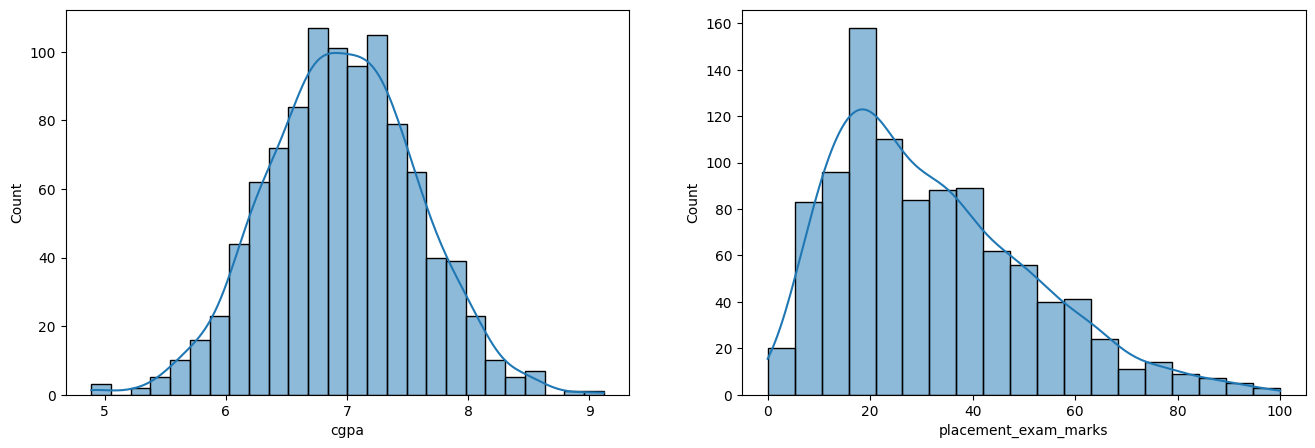

In [4]:
plt.figure(figsize= (16,5))
plt.subplot(1,2,1)
sns.histplot(df['cgpa'], kde= True)

plt.subplot(1,2,2)
sns.histplot(df['placement_exam_marks'], kde= True)
plt.show()

In [5]:
df['placement_exam_marks'].describe()

count    1000.000000
mean       32.225000
std        19.130822
min         0.000000
25%        17.000000
50%        28.000000
75%        44.000000
max       100.000000
Name: placement_exam_marks, dtype: float64

In [6]:
df['placement_exam_marks'].skew()

0.8356419499466834

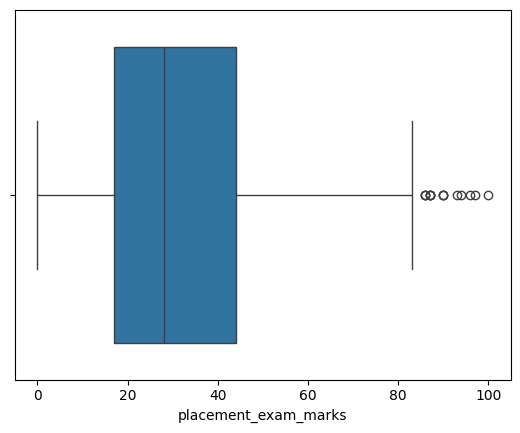

In [12]:
sns.boxplot(df['placement_exam_marks'], orient='h')
plt.show()

**Finding the IQR**

In [13]:
percentile25 = df['placement_exam_marks'].quantile(0.25)
percentile75 =df['placement_exam_marks'].quantile(0.75)

In [14]:
percentile75


44.0

In [15]:
percentile25

17.0

In [16]:
iqr= percentile75-percentile25

In [17]:
iqr

27.0

In [18]:
upper_limit= percentile75 +1.5*iqr
lower_limit= percentile25 -1.5*iqr

In [19]:
upper_limit

84.5

In [20]:
lower_limit

-23.5

**Finding Outliers**

In [21]:
df[df['placement_exam_marks']> upper_limit]

,cgpa,placement_exam_marks,placed
9,7.75,94.0,1
40,6.60,86.0,1
61,7.51,86.0,0
134,6.33,93.0,0
162,7.80,90.0,0
283,7.09,87.0,0
290,8.38,87.0,0
311,6.97,87.0,1
324,6.64,90.0,0
630,6.56,96.0,1


In [22]:
df[df['placement_exam_marks']< lower_limit]

,cgpa,placement_exam_marks,placed


**Trimming**

In [23]:
new_df= df[df['placement_exam_marks']< upper_limit]

In [24]:
new_df.shape

(985, 3)

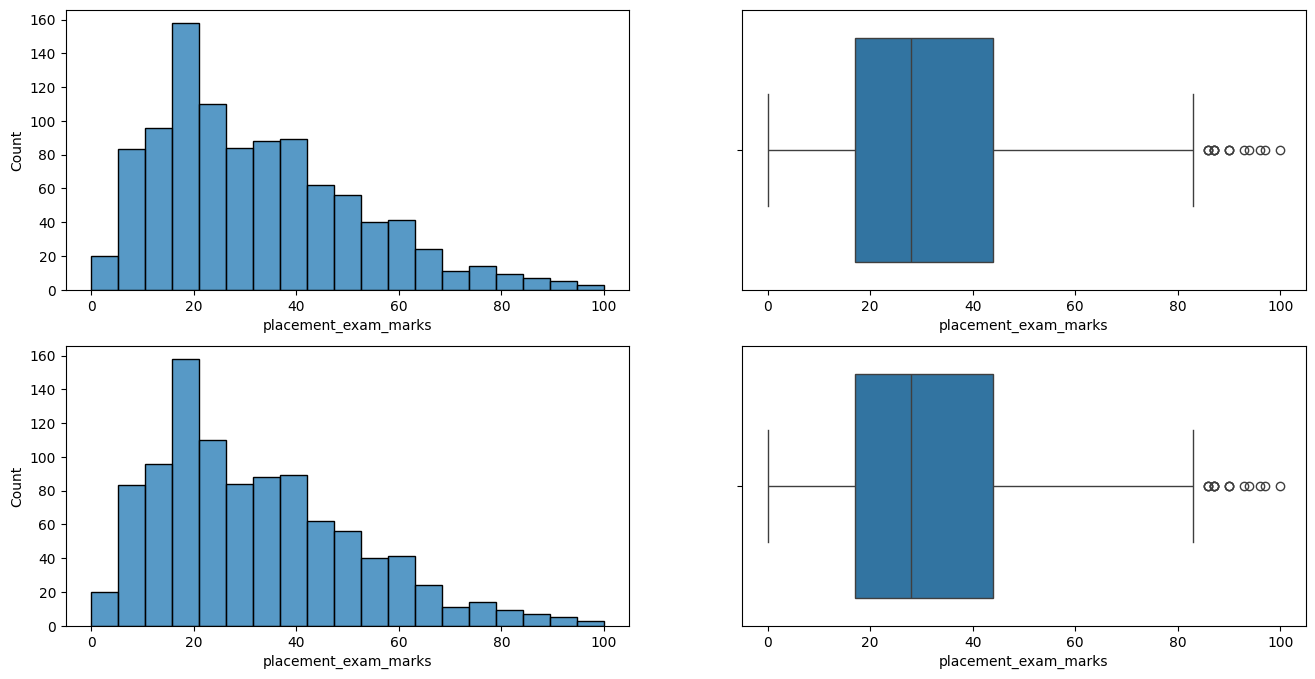

In [27]:
#Comparison


plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.histplot(df['placement_exam_marks'])

plt.subplot(2,2,2)
sns.boxplot(df['placement_exam_marks'], orient='h')

plt.subplot(2,2,3)
sns.histplot(df['placement_exam_marks'])

plt.subplot(2,2,4)
sns.boxplot(df['placement_exam_marks'], orient='h')

plt.show()

**Capping**

In [28]:
new_df_cap= df.copy()


new_df_cap['placement_exam_marks']= np.where(
    new_df_cap['placement_exam_marks']> upper_limit,
    upper_limit,
    np.where(
        new_df_cap['placement_exam_marks']< lower_limit,
        lower_limit,
        new_df_cap['placement_exam_marks']
    )

)

In [ ]:
# np.where(condition, True, false)

In [29]:
new_df_cap.shape

(1000, 3)

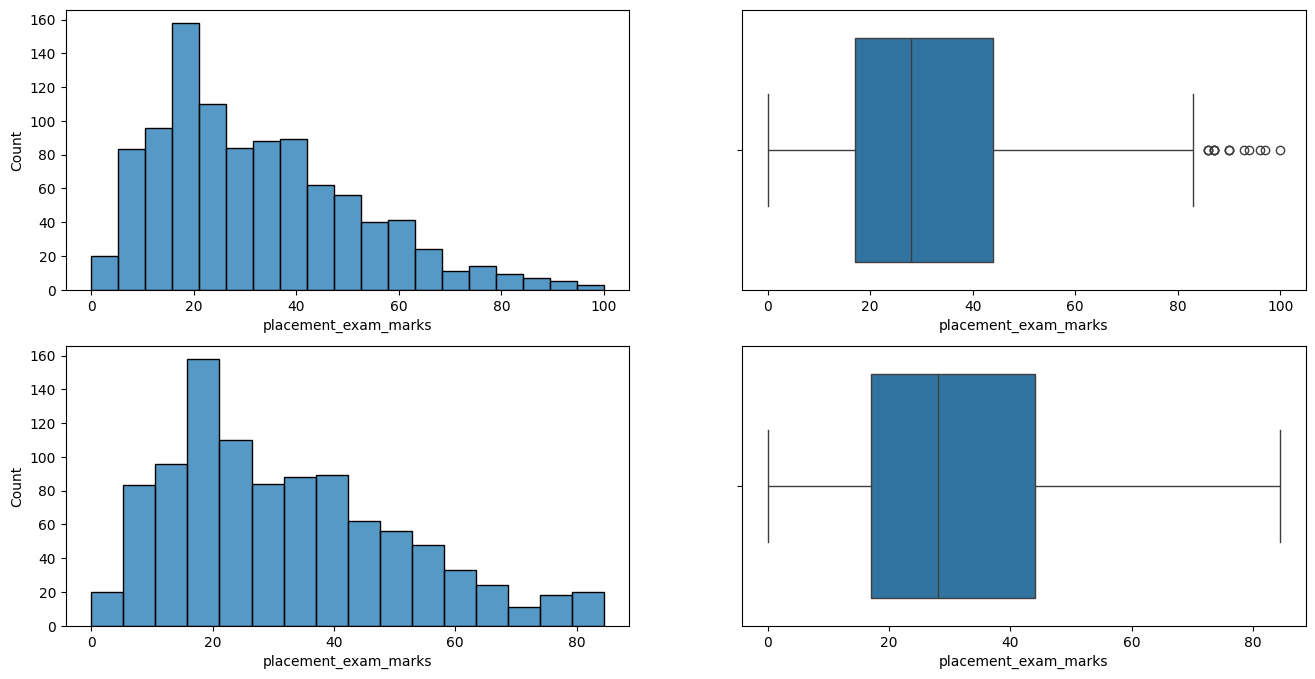

In [31]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.histplot(df['placement_exam_marks'])

plt.subplot(2,2,2)
sns.boxplot(df['placement_exam_marks'], orient='h')

plt.subplot(2,2,3)
sns.histplot(new_df_cap['placement_exam_marks'])

plt.subplot(2,2,4)
sns.boxplot(new_df_cap['placement_exam_marks'], orient='h')

plt.show()